# Brief Summary of Fourier Methods for Image Processing


# Now we move on to the actual tutorial


1) Imports and backend configuration

2) Scipy example (easy on the cpu stuff)

3) PyTorch example (with and without GPU using context environment!!! It's so neat!)

4) Harder examples

5) Benchmarking

6) Talk about how to implement in CUDA and point to resources that are useful for this kind of stuff

Work in progress, but... it works lol

In [3]:
# Import necessary libraries and setup default configurations

import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

import imageio

import torch
import torch.nn.functional as F

# Make sure backend behaves deterministically for reproducability
torch.backends.cudnn.deterministic = True

<IPython.core.display.Javascript object>


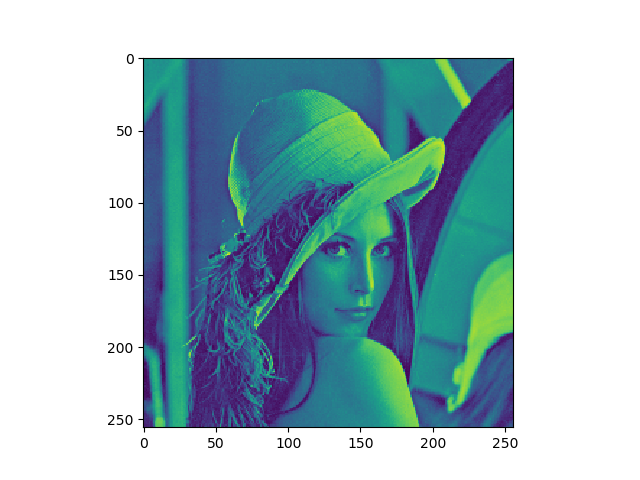

In [38]:
# Set up Lena.tif input
lenna = imageio.imread("../images/inputs/lenna-256x256.tif").astype(np.float32)

fig = plt.figure()
plt.imshow(lenna)
plt.show()

In [55]:
# Set up PSF kernel of shape 5x5
psf = np.asarray([[1,1,20,1,1],
                  [1,1,1,1,1],
                  [20,1,-1,1,20],
                  [1,1,1,1,1],
                  [1,1,20,1,1]], dtype=np.float32)

Shape of Lenna tensor is:   torch.Size([1, 1, 256, 256])
Shape of PSF tensor is:   torch.Size([1, 1, 5, 5])
Shape of Output tensor is:   torch.Size([1, 1, 252, 252])
[[13239. 13097. 13086. ...  9437.  9297.  8207.]
 [13113. 12907. 13104. ...  7142.  7054.  7128.]
 [12968. 13077. 13021. ...  6388.  6150.  5769.]
 ...
 [ 3261.  3409.  3617. ...  3337.  3552.  3975.]
 [ 2841.  2819.  3477. ...  3554.  3911.  4880.]
 [ 2839.  2696.  3127. ...  4071.  4285.  5029.]]


<IPython.core.display.Javascript object>


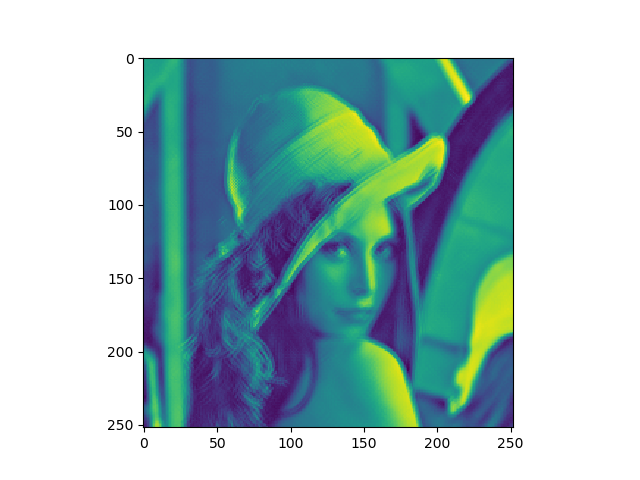

In [56]:
# Show pytorch gpu method

# convert to tensor of shape: [sample_size, channels, height, width]
lenna_tensor = torch.from_numpy(lenna)
lenna_tensor.unsqueeze_(0).unsqueeze_(0)   # adds dimensions of samplesize and channels or depth (for single image case)
print("Shape of Lenna tensor is:  ", lenna_tensor.size())

psf_tensor = torch.from_numpy(psf)
psf_tensor.unsqueeze_(0).unsqueeze_(0)   # adds dimensions of samplesize and channels or depth (for single image case)
print("Shape of PSF tensor is:  ", psf_tensor.size())

# perform filtering
output_tensor = F.conv2d(lenna_tensor.cuda(), psf_tensor.cuda()).to("cpu")   # without the '.to("cpu")' results would be on gpu
print("Shape of Output tensor is:  ", output_tensor.size())

# print(lenna_tensor.device)
# print(psf_tensor.device)
# print(output_tensor.device)

output = np.asarray(output_tensor)[0,0,:,:]   # For now we just want the [H,W] image representation
print(output)

# plot result
fig = plt.figure()
plt.imshow(output)
plt.show()